In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
timed_df = pd.read_csv("close_dupli.csv")
timed_df.fillna(0, inplace=True)


timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)
# timed_df = timed_df.drop(columns='Date')


# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]


# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [3]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2019-09-19'
end_date = '2024-08-02'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 50  # Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

timed_df = timed_df.replace(0, np.nan).ffill()
timed_df = timed_df.replace(0, np.nan).bfill()
# random num columns


timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.isna().sum().sum()

0

In [4]:
timed_df.head()

,IITLPROJ,JENBURPH,KILITCH,ALKYLAMINE,HBPOR,RIIL,ARTSONEN,SYSTMTXC,ADANIENT,PRECISION,...,FAZE3Q,USHAMART,OAL,EMPOWER,FLEXFO,KTKBANK,NOL,BOSCHLTD,PCCOSMA,RATNAMANI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-19,23.0,440.000000,117.150002,307.820007,16.990000,257.399994,33.700001,56.900002,142.399994,0.21,...,32.250000,26.100000,197.550003,0.19,50.849998,68.727272,38.400002,13476.150391,99.949997,611.200012
2019-09-20,23.0,436.850006,123.000000,316.000000,16.520000,268.600006,34.000000,56.900002,149.199997,0.21,...,32.500000,25.850000,197.550003,0.19,52.099998,71.954544,40.299999,14045.049805,95.050003,622.133362
2019-09-23,23.0,442.000000,126.599998,342.679993,15.520000,281.200012,34.049999,56.900002,152.550003,0.21,...,32.599998,25.850000,192.500000,0.19,53.049999,74.045456,42.000000,14840.750000,94.900002,628.633362
2019-09-24,23.0,434.100006,125.050003,331.959991,16.129999,281.600006,33.700001,54.099998,148.050003,0.21,...,34.250000,25.299999,189.399994,0.19,52.250000,74.090912,43.450001,14592.349609,91.150002,646.666687
2019-09-25,23.0,437.500000,124.000000,331.959991,16.059999,275.399994,33.700001,54.099998,147.500000,0.21,...,33.950001,25.049999,220.800003,0.19,51.500000,71.772728,41.299999,14082.099609,94.550003,636.066650


Optimal Portfolio Weights:
OrderedDict([('IITLPROJ', 0.0), ('JENBURPH', 0.0), ('KILITCH', 0.0), ('ALKYLAMINE', 0.02066), ('HBPOR', 0.0), ('RIIL', 0.0), ('ARTSONEN', 0.0), ('SYSTMTXC', 0.03216), ('ADANIENT', 0.05156), ('PRECISION', 0.1281), ('BEEYU', 0.0296), ('MODINATUR', 0.00408), ('MENONBE', 0.0), ('TATACOFFEE', 0.0), ('ANSALBU', 0.0), ('UNIROYAL', 0.0), ('AARTIDRUGS', 0.00685), ('DHANBANK', 0.0), ('KRL', 0.1631), ('NNTL', 0.0), ('MAHSCOOTER', 0.0), ('IOB', 0.0), ('AUROLAB', 0.0), ('TOKYOPLAST', 0.0), ('UNITECH', 0.0), ('BAMBINO', 0.0), ('PRIVISCL', 0.0), ('ORBTEXP', 0.0), ('SHREEPAC', 0.08174), ('SAKTHIFIN', 0.0), ('PASUPTAC', 0.0), ('AMBIT', 0.0304), ('BBOX', 0.02118), ('FOODSIN', 0.0), ('RAJGLOWIR', 0.0), ('BHARATGEAR', 0.0), ('TIL', 0.0), ('WHIRLPOOL', 0.0), ('PENIND', 0.0), ('CENTENKA', 0.0), ('FAZE3Q', 0.02579), ('USHAMART', 0.02293), ('OAL', 0.0), ('EMPOWER', 0.3196), ('FLEXFO', 0.0), ('KTKBANK', 0.0), ('NOL', 0.0), ('BOSCHLTD', 0.0), ('PCCOSMA', 0.0), ('RATNAMANI', 0.06225)])

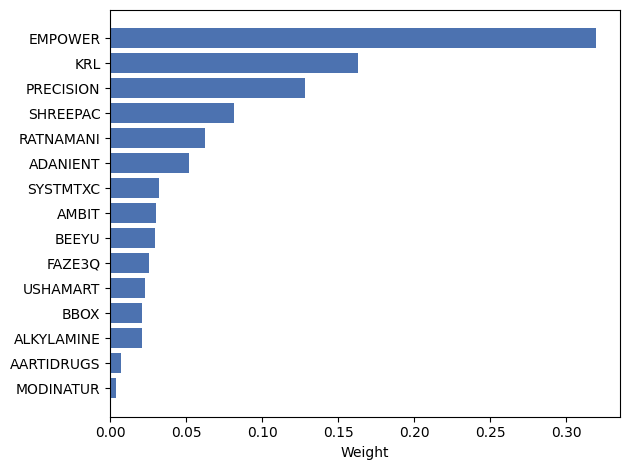

In [15]:
from pypfopt import BlackLittermanModel, risk_models, expected_returns, EfficientFrontier
from pypfopt import plotting
import pandas as pd
num_days_per_year = 252

df = timed_df

num_stocks = len(df.columns)

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Specify views
views = {
    # "Stock_1": 0.02,  # Absolute view: 2% expected return for "Stock_1"
    # Add more views if needed
}

# Black-Litterman model
bl = BlackLittermanModel(S, pi=mu, absolute_views=views)

# Calculate posterior expected returns and covariance matrix
bl_return = bl.bl_returns()
bl_covariance = bl.bl_cov()

# Optimize portfolio
ef = EfficientFrontier(bl_return, bl_covariance)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Display optimal portfolio weights
print("Optimal Portfolio Weights:")
print(cleaned_weights)
# remove zero weights
cleaned_weights =   {key: value for key, value in cleaned_weights.items() if value != 0}

# Plotting
plotting.plot_weights(cleaned_weights)
plt.show()
